### CNN ÌîÑÎ°úÏ†ùÌä∏

#### Ï£ºÏ†ú

- Î∞îÎã§ ÎèôÎ¨º Ïù¥ÎØ∏ÏßÄ Îã§Ï§ë Î∂ÑÎ•ò

#### Îç∞Ïù¥ÌÑ∞ ÏàòÏßë ÎßÅÌÅ¨

- kaggle: https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste


#### Î™©Ï∞®

1. Îç∞Ïù¥ÌÑ∞(Ïù¥ÎØ∏ÏßÄ) ÌÉêÏÉâ
2. ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(Ïù¥ÎØ∏ÏßÄ) Î∂ÑÎ¶¨ Î∞è ÌååÏùº Ï≤òÎ¶¨
3. ÏÇ¨Ï†Ñ ÌõàÎ†® Î™®Îç∏Î°ú Î∂ÑÎ•ò ÏòàÏ∏°
   1) VGG16
   2) Xception
   3) ResNet50
   4) MobileNetV2
4. Xception Î™®Îç∏ ÌïôÏäµ ÏßÑÌñâ
5. ÎØ∏ÏÑ∏ Ï°∞Ï†ï(fine-tuning) ÏßÑÌñâ
6. ÏöîÏïΩ Î∞è ÎäêÎÇÄÏ†ê

#### 1. Îç∞Ïù¥ÌÑ∞(Ïù¥ÎØ∏ÏßÄ) ÌÉêÏÉâ

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/sea_animals/original/'

idg = ImageDataGenerator(rescale=1./255)
generator = idg.flow_from_directory(root, target_size=(150, 150), batch_size=32, class_mode='categorical', shuffle=True)

print(generator.class_indices)

Found 13711 images belonging to 23 classes.
{'Clams': 0, 'Corals': 1, 'Crabs': 2, 'Dolphin': 3, 'Eel': 4, 'Fish': 5, 'Jelly Fish': 6, 'Lobster': 7, 'Nudibranchs': 8, 'Octopus': 9, 'Otter': 10, 'Penguin': 11, 'Puffers': 12, 'Sea Rays': 13, 'Sea Urchins': 14, 'Seahorse': 15, 'Seal': 16, 'Sharks': 17, 'Shrimp': 18, 'Squid': 19, 'Starfish': 20, 'Turtle_Tortoise': 21, 'Whale': 22}


- Ï¥ù 23Í∞ú Ï¢ÖÎ•òÏùò ÌÉÄÍ≤üÏùÑ Í∞ÄÏßÑ ÏïΩ 13,711Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
- Î¨¥ÏûëÏúÑÎ°ú Ïù¥ÎØ∏ÏßÄ 1Í∞úÎ•º ÏÑ†Ï†ïÌïòÏó¨ Ïã§Ï†úÎ°ú Ïñ¥ÎñªÍ≤å Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

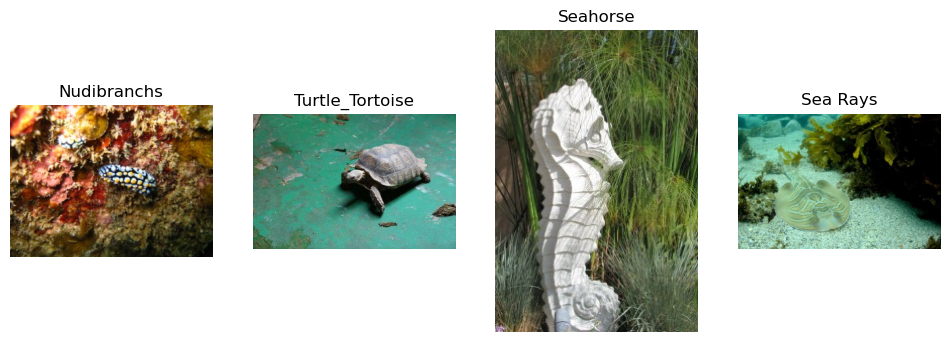

In [2]:
import cv2
import matplotlib.pyplot as plt
import random

def show_image(ax, image, label):
    ax.imshow(image)
    ax.set_title(label)
    ax.axis('off')

def get_random_images(generator, nrows=1, ncols=4):
    max_idx = generator.classes.__len__() - 1
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 3, 6))
    axs = axs.flatten()
    for i in range(nrows * ncols):
        random_idx = random.randint(0, max_idx)
        image = cv2.cvtColor(cv2.imread(generator.filepaths[random_idx]), cv2.COLOR_BGR2RGB)
        label = [k for k, v in generator.class_indices.items() if v == generator.classes[random_idx]][0]
        show_image(axs[i], image, label)
    plt.show()

get_random_images(generator)

#### 2. ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(Ïù¥ÎØ∏ÏßÄ) Î∂ÑÎ¶¨ Î∞è ÌååÏùº Ï≤òÎ¶¨
- Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨ÌïòÍ∏∞ ÏúÑÌï¥ Í∞Å ÌååÏùºÏùò Í≤ΩÎ°úÏôÄ ÌÉÄÍ≤üÏùÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [2]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'Clams',
 1: 'Corals',
 2: 'Crabs',
 3: 'Dolphin',
 4: 'Eel',
 5: 'Fish',
 6: 'Jelly Fish',
 7: 'Lobster',
 8: 'Nudibranchs',
 9: 'Octopus',
 10: 'Otter',
 11: 'Penguin',
 12: 'Puffers',
 13: 'Sea Rays',
 14: 'Sea Urchins',
 15: 'Seahorse',
 16: 'Seal',
 17: 'Sharks',
 18: 'Shrimp',
 19: 'Squid',
 20: 'Starfish',
 21: 'Turtle_Tortoise',
 22: 'Whale'}

In [3]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])
print(target_names.__len__())

13711


In [4]:
import pandas as pd

original_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
original_df.loc[:, 'file_paths'] = original_df.file_paths.apply(lambda x: x.replace('\\', '/'))

display(original_df)

file_paths target_names  targets
0      ./datasets/sea_animals/original/Clams/10004815...        Clams        0
1      ./datasets/sea_animals/original/Clams/10057431...        Clams        0
2      ./datasets/sea_animals/original/Clams/10057493...        Clams        0
3      ./datasets/sea_animals/original/Clams/10057511...        Clams        0
4      ./datasets/sea_animals/original/Clams/10057638...        Clams        0
...                                                  ...          ...      ...
13706  ./datasets/sea_animals/original/Whale/Whale (8...        Whale       22
13707  ./datasets/sea_animals/original/Whale/Whale (8...        Whale       22
13708  ./datasets/sea_animals/original/Whale/Whale (8...        Whale       22
13709  ./datasets/sea_animals/original/Whale/Whale (8...        Whale       22
13710  ./datasets/sea_animals/original/Whale/Whale (9...        Whale       22

[13711 rows x 3 columns]

- Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°úÎ∂ÄÌÑ∞ `sklearn`Ïùò `train_test_split()`ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ¶¨Ìï©ÎãàÎã§.

In [5]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_targets, test_targets = \
train_test_split(original_df.file_paths, original_df.targets, stratify=original_df.targets, test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
21    1522
6      676
3      625
17     472
14     463
22     458
9      450
12     425
13     414
8      400
10     400
1      400
20     399
7      399
2      399
4      398
0      398
5      395
18     390
11     386
19     386
15     382
16     331
Name: count, dtype: int64
targets
21    381
6     169
3     157
17    118
14    116
22    114
9     112
12    106
13    103
20    100
1     100
7     100
8     100
2     100
10    100
5      99
4      99
0      99
18     98
19     97
11     96
15     96
16     83
Name: count, dtype: int64


In [6]:
train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, train_targets, stratify=train_targets, test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())

targets
21    1218
6      541
3      500
17     378
14     370
22     366
9      360
12     340
13     331
1      320
10     320
8      320
2      319
20     319
7      319
4      318
0      318
5      316
18     312
11     309
19     309
15     306
16     265
Name: count, dtype: int64
targets
21    304
6     135
3     125
17     94
14     93
22     92
9      90
12     85
13     83
7      80
8      80
20     80
10     80
1      80
0      80
2      80
4      80
5      79
18     78
11     77
19     77
15     76
16     66
Name: count, dtype: int64


- Î∂ÑÎ¶¨Ìïú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Í∞ÅÍ∞Å ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°úÎ∂ÄÌÑ∞ Ïù∏Îç±Ïä§Î°ú Ï∂îÏ∂úÌïòÏó¨ Î≥ÑÎèÑÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§.

In [7]:
train_df = original_df.iloc[train_images.index].reset_index(drop=True)
validation_df = original_df.iloc[validation_images.index].reset_index(drop=True)
test_df = original_df.iloc[test_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(8774, 3)
(2194, 3)
(2743, 3)


- Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÎì§ÏùÑ ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨Ìïú Î∞îÏóê ÎßûÍ≤å Ìè¥ÎçîÎ•º ÎÇòÎàÑÏñ¥ Î≥µÏÇ¨Ìï¥Ï§çÎãàÎã§.

In [16]:
import shutil
import os

root = './datasets/sea_animals/'

for file_path in train_images:
    sea_animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + sea_animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)
    
for file_path in validation_images:
    sea_animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + sea_animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

for file_path in test_images:
    sea_animal_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'test/' + sea_animal_dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

#### 3. ÏÇ¨Ï†Ñ ÌõàÎ†® Î™®Îç∏Î°ú Î∂ÑÎ•ò ÏòàÏ∏°
- `VGG16`, `Xception`, `ResNet50V2`, `MobileNetV2` Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
- Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï† Îïå Í∞ÄÏ§ëÏπòÎ•º `Imagenet` Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÌïú Í∞ÄÏ§ëÏπòÎ°ú Î∂àÎü¨Ïò® ÌõÑ Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï®ÏúºÎ°úÏç®,  
  Î∞îÎã§ ÎèôÎ¨º Îç∞Ïù¥ÌÑ∞Í∞Ä `Imagenet` Îç∞Ïù¥ÌÑ∞ÏôÄ Ïú†ÏÇ¨ÎèÑÍ∞Ä ÎÜíÏùÄÏßÄ Ïó¨Î∂ÄÎ•º ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2, Xception, MobileNetV2
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

IMAGE_SIZE = 224
BATCH_SIZE = 64

def path_to_input(img_path, preprocess_function, image_size=IMAGE_SIZE):
    img = image.load_img(img_path, target_size=(image_size, image_size))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return preprocess_function(img)

vgg = VGG16(weights='imagenet')
xcep = Xception(weights='imagenet')
res = ResNet50V2(weights='imagenet')
mob = MobileNetV2(weights='imagenet')

In [10]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import decode_predictions as vgg_decode_predictions
from tensorflow.keras.applications.xception import decode_predictions as xception_decode_predictions
from tensorflow.keras.applications.resnet_v2 import decode_predictions as resnet_decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions as mobilenet_decode_predictions

def show_random_image_with_prediction(model, model_name='vgg16'):
    image_size = IMAGE_SIZE
    if model_name == 'vgg16':
        preprocess_function = vgg_preprocess_input
        decode = vgg_decode_predictions
        
    elif model_name == 'xception':
        preprocess_function = xception_preprocess_input
        decode = xception_decode_predictions
        image_size = 299
        
    elif model_name == 'resnet50v2':
        preprocess_function = resnet_preprocess_input
        decode = resnet_decode_predictions
        
    elif model_name == 'mobilenetv2':
        preprocess_function = mobilenet_preprocess_input
        decode = mobilenet_decode_predictions
        
    else:
        return
    
    fig, axs = plt.subplots(2, 4, figsize=(12, 6))
    axs = axs.flatten()
    
    for i in range(8):
        random_idx = random.randint(0, original_df.shape[0]-1)
        img_path = generator.filepaths[random_idx]
        image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        label = [k for k, v in generator.class_indices.items() if v == generator.classes[random_idx]][0]
        input_tensor = path_to_input(img_path, preprocess_function, image_size=image_size)
        predictions = model.predict(input_tensor)
        decoded_predictions = decode(predictions, top=3)[0][0][1]
        show_image(axs[i], image, label)
        print(decoded_predictions)
    plt.show()

- Î®ºÏ†Ä VGG16 Î™®Îç∏Î°ú ÎûúÎç§Ìïú 8Í∞ú Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú ÏòàÏ∏°(`predict()`)ÏùÑ ÏàòÌñâÌïòÏó¨ Ïã§Ï†ú Ï†ïÎãµÍ≥º ÎπÑÍµêÌï¥Î¥ÖÎãàÎã§.

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 82ms/step
jellyfish
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 76ms/step
seashore
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 76ms/step
coral_reef
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 74ms/step
eel
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 74ms/step
jellyfish
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 81ms/step
puffer
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 82ms/step
tiger_shark
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 73ms/step
jellyfish


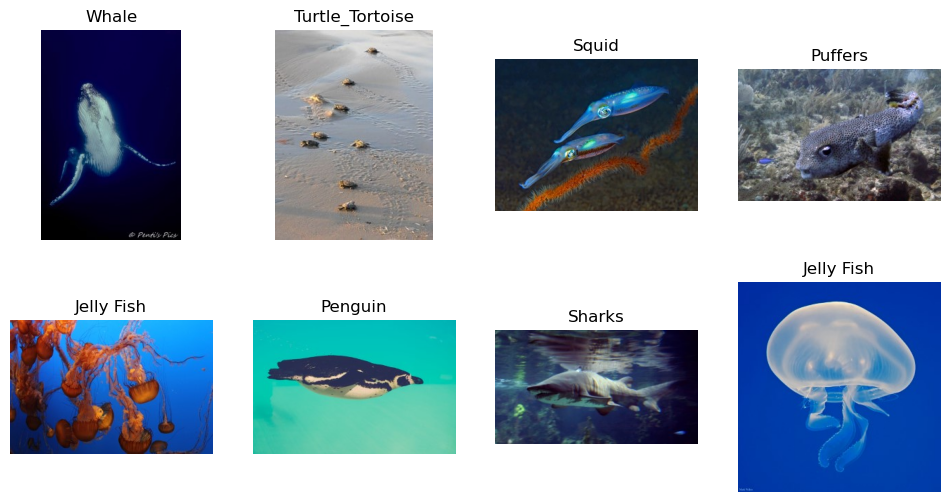

In [29]:
show_random_image_with_prediction(vgg)

- Îëê Î≤àÏß∏Îäî `Xception` Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°Ìï©ÎãàÎã§.

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 768ms/step
eel
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 62ms/step
starfish
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 62ms/step
jellyfish
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 62ms/step
starfish
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 68ms/step
tiger_shark
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 64ms/step
sea_cucumber
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 66ms/step
starfish
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 61ms/step
terrapin


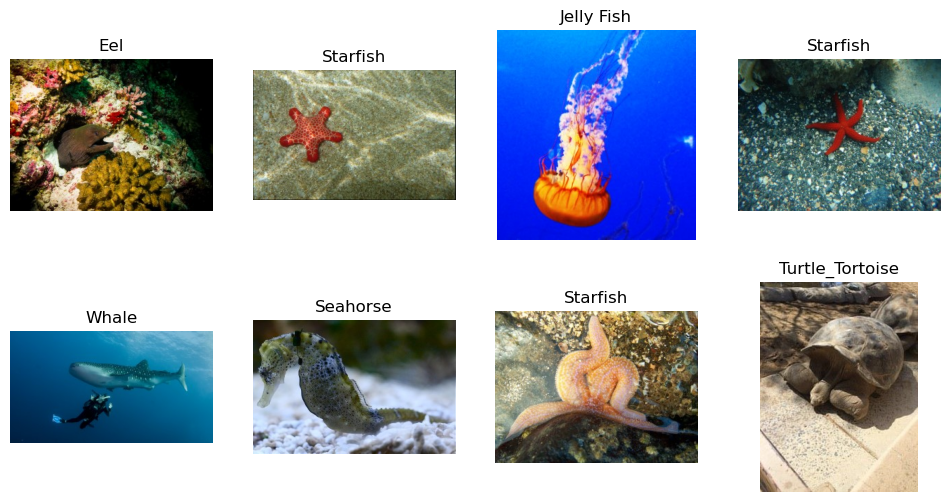

In [34]:
show_random_image_with_prediction(xcep, model_name='xception')

- ÏÑ∏ Î≤àÏß∏Îäî `ResNet50V2` Î™®Îç∏ÏûÖÎãàÎã§.

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
honeycomb
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step
tiger_shark
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step
coral_fungus
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
mask
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
leatherback_turtle
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step
tiger_shark
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
sea_slug
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step
rock_beauty


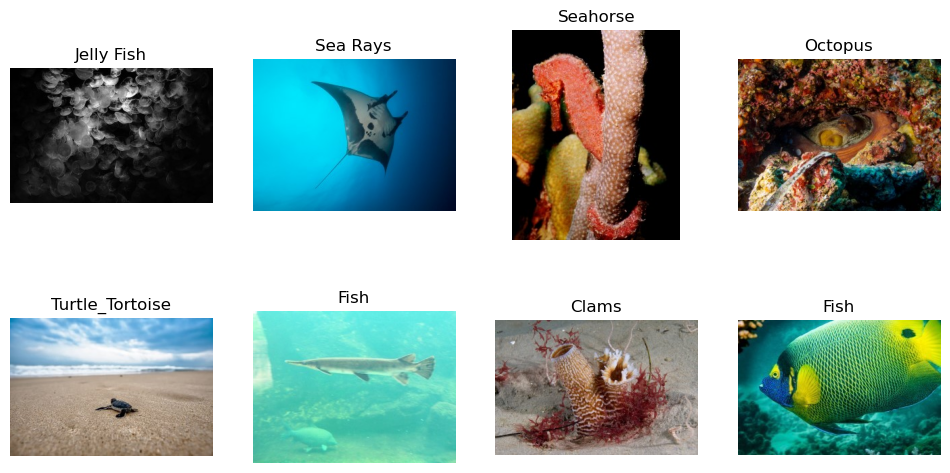

In [35]:
show_random_image_with_prediction(res, model_name='resnet50v2')

- ÎßàÏßÄÎßâÏúºÎ°ú `MobileNetV2` Î™®Îç∏ÏûÖÎãàÎã§.

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 773ms/step
hammerhead
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step
rock_beauty
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
sea_slug
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
coral_reef
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step
jellyfish
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 33ms/step
frilled_lizard
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step
sea_slug
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
loggerhead


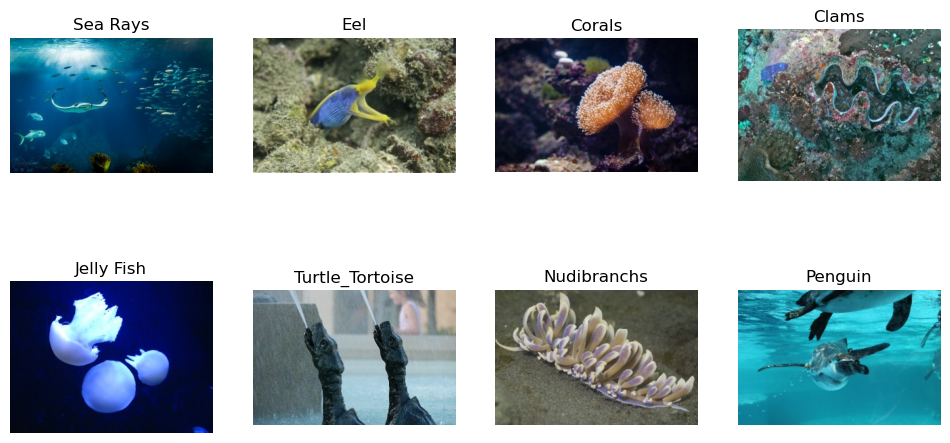

In [36]:
show_random_image_with_prediction(mob, model_name='mobilenetv2')

- **ÎûúÎç§ÌïòÍ≤å Í≥†Î•∏ 8Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú `predict()` Í≤∞Í≥º, 4Í∞ÄÏßÄ ÏÇ¨Ï†ÑÌõàÎ†®Î™®Îç∏ Î™®Îëê ÎåÄÏ≤¥Î°ú Ïñ¥Îäê Ï†ïÎèÑ Ï§ÄÏàòÌïú ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.**
- Ïù¥Îäî Í∞Å ÏÇ¨Ï†ÑÌõàÎ†®Î™®Îç∏Ïù¥ ÌïôÏäµÌïú `imagenet` Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º, ÌòÑÏû¨ ÌïôÏäµ ÎåÄÏÉÅ Îç∞Ïù¥ÌÑ∞ÏÖãÏù∏ Î∞îÎã§ ÎèôÎ¨º **Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ïú†ÏÇ¨ÎèÑÍ∞Ä  
  Ïñ¥Îäê Ï†ïÎèÑ Ï°¥Ïû¨Ìï®**ÏùÑ ÏãúÏÇ¨ÌïúÎã§Í≥† Î≥º Ïàò ÏûàÏäµÎãàÎã§.
- ÌäπÌûà `Xception` Î™®Îç∏Ïùò Í≤ΩÏö∞ ÎûúÎç§ÌïòÍ≤å Í≥†Î•∏ 8Í∞úÏùò Ïù¥ÎØ∏ÏßÄ Ï§ë 6Í∞úÎ•º Ï†ïÌôïÌûà ÎßûÏ∑ÑÏúºÎØÄÎ°ú,  
  `Xception` Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏßÅÏ†ë Î∞îÎã§ ÎèôÎ¨º Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏãúÏºúÎ≥¥Í≥†Ïûê Ìï©ÎãàÎã§.

#### 4. Xception Î™®Îç∏ ÌïôÏäµ ÏßÑÌñâ

- `Xception` Î™®Îç∏Ïùò `Convolution Backbone` Ï∏µÏùÑ Í∞ÄÏ†∏Ïò® ÌõÑ, ÏßÅÏ†ë `Classifier Layer`Î•º Ïû¨Ï†ïÏùòÌïòÏó¨ `fit()`ÏùÑ ÌÜµÌï¥ ÌïôÏäµÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.
- Î®ºÏ†Ä `keras` ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò `Sequence` ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜç Î∞õÎäî `Dataset` ÌÅ¥ÎûòÏä§Î•º ÎßåÎì§Ïñ¥ Ïù¥ÌõÑ ÌõàÎ†®Ïóê ÌôúÏö©ÌïòÍ≥†Ïûê Ìï©ÎãàÎã§.
- Ìï¥Îãπ ÌÅ¥ÎûòÏä§Î•º ÎßåÎìúÎäî Î™©Ï†ÅÏùÄ `__len__()`, `__getitem__()`, `on_epoch_end()`Îì±Ïùò Î©îÏÜåÎìúÎ•º Ïû¨Ï†ïÏùòÌï®ÏúºÎ°úÏç®,  
  Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨Ïò¨ Îïå `augmentation`ÏùÑ Ï†ÅÏö©ÌïòÍ±∞ÎÇò Ïä§ÏºÄÏùºÎßÅ Í¥ÄÎ†® `preprocess function`ÏùÑ Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§.

In [8]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 224
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)

            results_batch[i] = image

        return results_batch, targets_batch

    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)
            

- Îã§ÏùåÏùÄ `create_model()` Ìï®ÏàòÎ•º Ï†ïÏùòÌï©ÎãàÎã§.
- Ìï¥Îãπ Ìï®ÏàòÏùò Î™©Ï†ÅÏùÄ Ï†ÑÎã¨ Î∞õÏùÄ ÏÇ¨Ï†Ñ ÌõàÎ†® Î™®Îç∏Ïùò Ï¢ÖÎ•òÏóê Îî∞Îùº `Convolution Backbone` Ï∏µÏùÑ ÏïåÎßûÍ≤å ÏÇ¨Ïö©ÌïòÍ≥†,  
  Ïù¥ÌõÑ ÌõàÎ†®Ìï† Îç∞Ïù¥ÌÑ∞Ïùò ÌÉÄÍ≤üÏóê ÎßûÍ≤å Î∂ÑÎ•òÍ∏∞(`Classifier Layer`)Î•º Ïû¨Ï†ïÏùòÌïòÏó¨ `concatenate`ÌïòÍ∏∞ ÏúÑÌï®ÏûÖÎãàÎã§.

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': 
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # Î∂ÑÎ•òÍ∏∞
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(23, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)

    if verbose:
        model.summary()
    else:
        pass

    return model

- ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌååÏùº Í≤ΩÎ°úÏôÄ ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ `Dataset`Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.

In [10]:
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = train_df['targets'].values

validation_file_paths = validation_df['file_paths'].values
validation_targets = validation_df['targets'].values

test_file_paths = test_df['file_paths'].values
test_targets = test_df['targets'].values

train_dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, preprocess=xception_preprocess_input, shuffle=True)
validation_dataset = Dataset(validation_file_paths, validation_targets, batch_size=BATCH_SIZE, preprocess=xception_preprocess_input)
test_dataset = Dataset(test_file_paths, test_targets, batch_size=BATCH_SIZE, preprocess=xception_preprocess_input)

- `Xception` ÏÇ¨Ï†ÑÌõàÎ†®Î™®Îç∏ÏùÑ ÌôúÏö©Ìïú `model`Í∞ùÏ≤¥Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

Model: "functional_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                  ‚îÉ Output Shape              ‚îÉ         Param # ‚îÉ Connected to               ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_4 (InputLayer)    ‚îÇ (None, 224, 224, 3)       ‚îÇ               0 ‚îÇ -                          ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv1 (Conv2D)         ‚îÇ (None, 111, 111, 32)      ‚îÇ             864 ‚îÇ input_layer_4[0][0]        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv1_bn               ‚îÇ (None, 111, 111, 32)      ‚îÇ             128 ‚îÇ block1_conv1[0][0]         ‚îÇ
‚îÇ (BatchNormalization)          ‚îÇ                           ‚îÇ                 ‚îÇ                            ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv1_act (Activation) ‚îÇ (None, 111, 111, 32)      ‚îÇ               0 ‚îÇ block1_conv1_bn[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv2 (Conv2D)         ‚îÇ (None, 109, 109, 64)      ‚îÇ          18,432 ‚îÇ block1_conv1_act[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv2_bn               ‚îÇ (None, 109, 109, 64)      ‚îÇ             256 ‚îÇ block1_conv2[0][0]         ‚îÇ
‚îÇ (BatchNormalization)          ‚îÇ                           ‚îÇ                 ‚îÇ                            ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv2_act (Activation) ‚îÇ (None, 109, 109, 64)      ‚îÇ               0 ‚îÇ block1_conv2_bn[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 21,068,703 (80.37 MB)

 Trainable params: 21,014,175 (80.16 MB)

 Non-trainable params: 54,528 (213.00 KB)

- ÏΩúÎ∞±ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
- `ModelCheckpoint`Î•º ÌÜµÌï¥ `epoch`ÎßàÎã§ Í∞ÄÏ§ëÏπòÎ•º ÌååÏùºÎ°ú ÎÇ¥Î≥¥ÎÇ¥ Ï†ÄÏû•Ìï©ÎãàÎã§.
- `ReduceLROnPlateau`Î•º ÌÜµÌï¥ `val_loss`Ïùò Î≥ÄÌôîÏóê Îî∞Îùº ÌïôÏäµÎ•†ÏùÑ ÎèôÏ†ÅÏúºÎ°ú Ï°∞Ï†ïÌï©ÎãàÎã§.
- `EarlyStopping`ÏùÑ ÌÜµÌï¥ `val_loss`Í∞Ä ÏùºÏ†ï `epoch` Î∞òÎ≥µ ÎèôÏïà Í∞êÏÜåÌïòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£åÌï©ÎãàÎã§.

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/sea_animals/xception/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

- `gc`Î•º ÌÜµÌï¥ Î©îÎ™®Î¶¨Î•º ÏµúÏ†ÅÌôîÌïú ÌõÑ, `fit()`ÏùÑ ÌÜµÌï¥ ÌõàÎ†®ÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [16]:
import gc

gc.collect()

729

In [17]:
N_EPOCHS = 20

history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1575s 11s/step - acc: 0.4693 - loss: 1.9276 - val_acc: 0.5934 - val_loss: 1.6295 - learning_rate: 0.0010
Epoch 2/20
138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1559s 11s/step - acc: 0.7662 - loss: 0.8871 - val_acc: 0.6814 - val_loss: 1.2629 - learning_rate: 0.0010
Epoch 3/20
138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1582s 11s/step - acc: 0.8323 - loss: 0.6430 - val_acc: 0.6290 - val_loss: 1.6065 - learning_rate: 0.0010
Epoch 4/20
138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1455s 11s/step - acc: 0.8569 - loss: 0.5577 - val_acc: 0.6577 - val_loss: 1.2591 - learning_rate: 0.0010
Epoch 5/20
138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1363s 10s/step - acc: 0.8715 - loss: 0.5081 - val_acc: 0.7106 - val_loss: 1.1892 - learning_rate: 0.0010
Epoch 6/20
138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1376s 

In [18]:
model.evaluate(test_dataset)

43/43 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 78s 2s/step - acc: 0.8239 - loss: 0.8479


[0.8945260643959045, 0.8162595629692078]

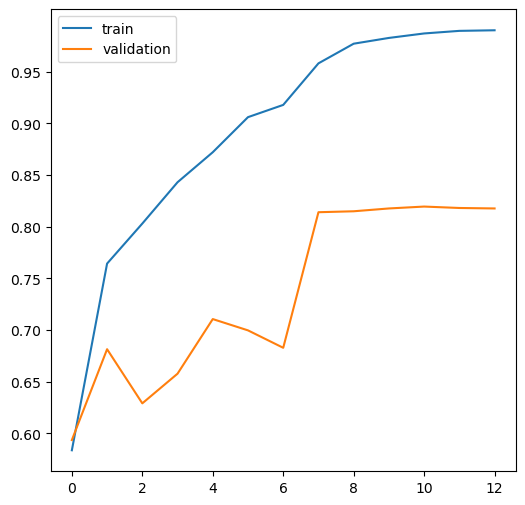

In [19]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

#### 5. ÎØ∏ÏÑ∏ Ï°∞Ï†ï(fine-tuning) ÏßÑÌñâ

- ÎØ∏ÏÑ∏ Ï°∞Ï†ïÏùÑ Ï†ÅÏö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÎßåÎì§Í≥† ÌïôÏäµÏãúÌÇ§Îäî Ìï®ÏàòÏù∏ `fine_tune()`ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.
- Î®ºÏ†Ä Î∂ÑÎ•òÍ∏∞Î•º Ï†úÏô∏Ìïú Î™®Îì† `Convolution Layer`Î•º freeze ÏãúÌÇ® Ï±ÑÎ°ú `fit()`ÏùÑ ÏàòÌñâÌïòÏó¨ 10 Epoch ÎèôÏïà ÌïôÏäµÌï©ÎãàÎã§.
- Ïù¥ÌõÑ `block 13`Í≥º `block 14` layerÎ•º ÌôúÏÑ±ÌôîÏãúÌÇ® ÌõÑ Îã§Ïãú 10 Epoch ÎèôÏïà ÌïôÏäµÌïòÎêò, `Adam()` OptimizerÏùò ÌïôÏäµÎ•†ÏùÑ `1e-4`Î°ú ÎÇÆÏ∂îÏñ¥ ÏßÑÌñâÌï©ÎãàÎã§.
- Îã§ÏùåÏùÄ `block 11`Í≥º `block 12` layer ÎòêÌïú ÌôúÏÑ±ÌôîÌïòÏó¨ 10 Epoch ÎèôÏïà ÌïôÏäµÌïòÎêò, ÌïôÏäµÎ•†ÏùÑ `1e-5`Î°ú Ï°∞Ï†ïÌï©ÎãàÎã§.

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/sea_animals/xception/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import layers

IMAGE_SIZE = 224
BATCH_SIZE = 64

def fine_tune(datas, model_name, preprocess):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    THIRD_EPOCHS = 10
    
    train_file_paths, train_targets, validation_file_paths, validation_targets, test_file_paths, test_targets = datas

    train_dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, preprocess=preprocess, shuffle=True)
    validation_dataset = Dataset(validation_file_paths, validation_targets, batch_size=BATCH_SIZE, preprocess=preprocess)

    model = create_model(model_name=model_name, verbose=True)

    # 1Îã®Í≥Ñ: Î∂ÑÎ•òÍ∏∞(Classifier layers) Ï∏µÏùÑ Ï†úÏô∏Ìïú layerÎì§ÏùÑ Î™®Îëê freeze
    for layer in model.layers[:-5]:
        layer.trainable = False

    model.compile(optimizer=Adam(1e-3), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
    history1 = model.fit(train_dataset, 
                         batch_size=BATCH_SIZE, 
                         epochs=FIRST_EPOCHS, 
                         validation_data=validation_dataset,
                         callbacks=[mcp_cb, rlr_cb, ely_cb]
                        )

    # 2Îã®Í≥Ñ: block 13, 14 Ï∏µ ÌôúÏÑ±Ìôî
    for layer in model.layers[125:-5]:
        layer.trainable = True

    model.compile(optimizer=Adam(1e-4), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
    history2 = model.fit(train_dataset, 
                         batch_size=BATCH_SIZE, 
                         epochs=SECOND_EPOCHS, 
                         validation_data=validation_dataset,
                         callbacks=[mcp_cb, rlr_cb, ely_cb]
                        )

    # 3Îã®Í≥Ñ: block 11, 12 Ï∏µ ÌôúÏÑ±Ìôî
    for layer in model.layers[105:125]:
        layer.trainable = True

    model.compile(optimizer=Adam(1e-5), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
    history3 = model.fit(train_dataset, 
                         batch_size=BATCH_SIZE, 
                         epochs=THIRD_EPOCHS, 
                         validation_data=validation_dataset,
                         callbacks=[mcp_cb, rlr_cb, ely_cb]
                        )

    return model, history1, history2, history3

In [21]:
import gc

gc.collect()

482

In [22]:
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

model, history1, history2, history3 = fine_tune((train_file_paths, train_targets,
           validation_file_paths, validation_targets,
           test_file_paths, test_targets),
          'xception', xception_preprocess_input)

Model: "functional_5"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                  ‚îÉ Output Shape              ‚îÉ         Param # ‚îÉ Connected to               ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_3 (InputLayer)    ‚îÇ (None, 224, 224, 3)       ‚îÇ               0 ‚îÇ -                          ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv1 (Conv2D)         ‚îÇ (None, 111, 111, 32)      ‚îÇ             864 ‚îÇ input_layer_3[0][0]        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv1_bn               ‚îÇ (None, 111, 111, 32)      ‚îÇ             128 ‚îÇ block1_conv1[0][0]         ‚îÇ
‚îÇ (BatchNormalization)          ‚îÇ                           ‚îÇ                 ‚îÇ                            ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv1_act (Activation) ‚îÇ (None, 111, 111, 32)      ‚îÇ               0 ‚îÇ block1_conv1_bn[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv2 (Conv2D)         ‚îÇ (None, 109, 109, 64)      ‚îÇ          18,432 ‚îÇ block1_conv1_act[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv2_bn               ‚îÇ (None, 109, 109, 64)      ‚îÇ             256 ‚îÇ block1_conv2[0][0]         ‚îÇ
‚îÇ (BatchNormalization)          ‚îÇ                           ‚îÇ                 ‚îÇ                            ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ block1_conv2_act (Activation) ‚îÇ (None, 109, 109, 64)      ‚îÇ               0 ‚îÇ block1_conv2_bn[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 21,068,703 (80.37 MB)

 Trainable params: 21,014,175 (80.16 MB)

 Non-trainable params: 54,528 (213.00 KB)

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 413s 3s/step - acc: 0.4134 - loss: 2.0961 - val_acc: 0.7434 - val_loss: 0.8891 - learning_rate: 0.0010
Epoch 2/10
138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 398s 3s/step - acc: 0.6925 - loss: 1.0577 - val_acc: 0.7707 - val_loss: 0.7776 - learning_rate: 0.0010
Epoch 3/10
138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 405s 3s/step - acc: 0.7180 - loss: 0.9643 - val_acc: 0.7853 - val_loss: 0.7402 - learning_rate: 0.0010
Epoch 4/10
138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 417s 3s/step - acc: 0.7331 - loss: 0.8839 - val_acc: 0.7871 - val_loss: 0.7127 - learning_rate: 0.0010
Epoch 5/10
138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 447s 3s/step - acc: 0.7450 - loss: 0.8536 - val_acc: 0.7931 - val_loss: 0.6948 - learning_rate: 0.0010
Epoch 6/10
138/138 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 537s 4s/step - a

In [23]:
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 89s 2s/step - acc: 0.8434 - loss: 0.5455


[0.5529797077178955, 0.8428727388381958]

- 3Îã®Í≥Ñ (block 11, 12 Ï∏µÎ∂ÄÌÑ∞ ÌôúÏÑ±Ìôî) ÌïôÏäµÏùò Epoch 5ÏóêÏÑú `EarlyStopping` ÎêòÏóàÏäµÎãàÎã§.
- Ïù¥Îïå ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Ï†ïÌôïÎèÑÎäî Í∞ÅÍ∞Å ÏïΩ 0.9049, 0.8309, 0.8434Î°ú Îß§Ïö∞ Ï§ÄÏàòÌïú ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏúºÎ©∞,  
  ÎØ∏ÏÑ∏ Ï°∞Ï†ïÏùÑ ÏßÑÌñâÌïòÏßÄ ÏïäÏïòÏùÑ Îïå 13Î≤àÏùò EpochÏóê Í±∏Î¶∞ ÏãúÍ∞Ñ(ÏïΩ 18,000 Ï¥à)Î≥¥Îã§ Ìõ®Ïî¨ Ï†ÅÏùÄ ÏãúÍ∞Ñ ÏïàÏóê ÌïôÏäµÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÏóàÏäµÎãàÎã§.  
  Ïã§Ï†úÎ°ú ÎØ∏ÏÑ∏ Ï°∞Ï†ï(`fine-tuning`)ÏùÑ ÏßÑÌñâÌïòÏòÄÏùÑ Îïå Ï¥ù 25Î≤àÏùò EpochÎßåÌÅº Î∞òÎ≥µÌïòÎäî Îç∞ ÏïΩ 15,000 Ï¥àÍ∞Ä ÏÜåÏöîÎêòÏóàÏäµÎãàÎã§.

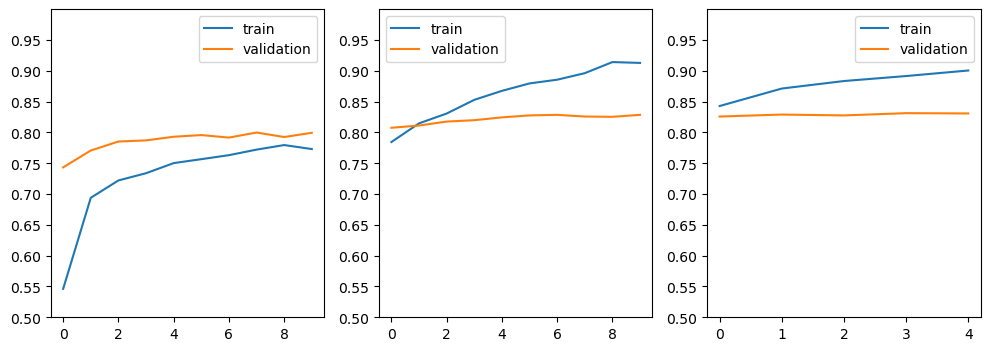

In [29]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].set_yticks(np.arange(0, 1, 0.05))
axs[0].set_ylim(0.5, 1)
axs[0].plot(history1.history['acc'], label='train')
axs[0].plot(history1.history['val_acc'], label='validation')
axs[0].legend()

axs[1].set_yticks(np.arange(0, 1, 0.05))
axs[1].set_ylim(0.5, 1)
axs[1].plot(history2.history['acc'], label='train')
axs[1].plot(history2.history['val_acc'], label='validation')
axs[1].legend()

axs[2].set_yticks(np.arange(0, 1, 0.05))
axs[2].set_ylim(0.5, 1)
axs[2].plot(history3.history['acc'], label='train')
axs[2].plot(history3.history['val_acc'], label='validation')
axs[2].legend()


plt.show()

#### üìå6. ÏöîÏïΩ Î∞è ÎäêÎÇÄÏ†ê

- ÏÉàÎ°úÏö¥ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î°ú ÏïÑÎ¨¥Îü∞ Ï∂îÍ∞Ä ÏûëÏóÖ ÏóÜÏù¥ `predict()`ÏùÑ ÏàòÌñâÌïòÏòÄÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥†, 4Í∞úÏùò ÏÇ¨Ï†ÑÌõàÎ†®Î™®Îç∏ Î™®Îëê Ïñ¥Îäê Ï†ïÎèÑ Ï§ÄÏàòÌïú ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÎã§Îäî Ï†êÏóêÏÑú,  
  `imagenet` Îì± ÏÇ¨Ï†ÑÌõàÎ†®Î™®Îç∏Ïù¥ ÌõàÎ†® ÎåÄÏÉÅÏúºÎ°ú ÏÑ†Ï†ïÌñàÎçò Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ÏôÄ Ïú†ÏÇ¨Ìïú Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ Ï∂îÍ∞ÄÏ†ÅÏù∏ ÌïôÏäµ ÏóÜÏù¥ÎèÑ  
  Ïñ¥Îäê Ï†ïÎèÑÏùò Ï†ïÌôïÎèÑÎ•º Ïù¥ÎÅåÏñ¥ÎÇº Ïàò ÏûàÎã§Îäî Ï†êÏù¥ ÎÜÄÎùºÏõ†ÏäµÎãàÎã§.
- Ïù¥Îïå ÌäπÌûà ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º Î≥¥ÏòÄÎã§Í≥† ÌåêÎã®ÎêòÎäî ÏÇ¨Ï†ÑÌõàÎ†®Î™®Îç∏Ïù∏ `Xception` Î™®Îç∏Ïùò Î∂ÑÎ•òÍ∏∞(`Classifier Layer`) Ï∏µÎßåÏùÑ Ïû¨Ï†ïÏùòÌïòÏó¨  
  Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÏòÄÏùÑ Îïå, ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÏùò Ï†ïÌôïÎèÑÍ∞Ä Í∞ÅÍ∞Å  
  **ÏïΩ 0.9899, 0.8177, 0.8239**Î°ú Îß§Ïö∞ Ï§ÄÏàòÌïú ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÏßÄÎßå Ïñ¥Îäê Ï†ïÎèÑ Í≥ºÏ†ÅÌï©Ïùò ÏúÑÌóòÏù¥ ÏûàÎã§Í≥† ÌåêÎã®ÌïòÏòÄÏäµÎãàÎã§.
- Ïù¥ÌõÑ ÎØ∏ÏÑ∏ Ï°∞Ï†ï(`fine-tuning`)ÏùÑ ÏßÑÌñâÌïòÏó¨,  
  Ï¥ù 30Î≤àÏùò EpochÎ•º Î∞òÎ≥µÌïòÎ©∞ 10Î≤àÎßàÎã§ ÌôúÏÑ±Ìôî Ï∏µÏùò Ï¢ÖÎ•òÏôÄ ÌïôÏäµÎ•†ÏùÑ Îã§Î•¥Í≤å ÏÑ§Ï†ïÌïòÏòÄÏäµÎãàÎã§.
- Ïù¥Îïå 25Î≤àÏß∏ EpochÏóêÏÑú `EarlyStopping`Ïù¥ Ï†ÅÏö©ÎêòÏóàÏúºÎ©∞ ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÏùò Ï†ïÌôïÎèÑÍ∞Ä Í∞ÅÍ∞Å  
  **ÏïΩ 0.9049, 0.8309, 0.8434**Î°ú, ÎØ∏ÏÑ∏ Ï°∞Ï†ï ÏóÜÏù¥ ÌïôÏäµÌïòÏòÄÏùÑ ÎïåÎ≥¥Îã§ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÏùò Ï†ïÌôïÎèÑÎäî Îã§ÏÜå ÎÇÆÏïòÏßÄÎßå,  
  Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÏùò Ï†ïÌôïÎèÑÍ∞Ä ÎπÑÏä∑ÌïòÍ≤å ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§.
- Í≤åÎã§Í∞Ä ÎØ∏ÏÑ∏ Ï°∞Ï†ï ÏóÜÏù¥ ÌïôÏäµÌïòÏòÄÏùÑ Îïå **13Î≤àÏùò EpochÎ•º Î∞òÎ≥µÌïòÎäî Îç∞ ÏïΩ 18,000Ï¥à**Í∞Ä ÏÜåÏöîÎêòÏóàÏßÄÎßå,  
  ÎØ∏ÏÑ∏ Ï°∞Ï†ïÏùÑ Ï†ÅÏö©ÌïòÏòÄÏùÑ Îïå **25Î≤àÏùò EpochÎ•º Î∞òÎ≥µÌïòÎäî Îç∞ ÏïΩ 15,000Ï¥à**Í∞Ä ÏÜåÏöîÎêòÏñ¥ ÏãúÍ∞Ñ Î≥µÏû°ÎèÑ Ï∏°Î©¥ÏóêÏÑúÎèÑ Îçî Ïú†Î¶¨Ìïú Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏóàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Ï†ÅÏùÄ ÏãúÍ∞Ñ ÏïàÏóê ÎπÑÏä∑Ìïú ÏÑ±Îä•ÏùÑ Î≥¥ÏòÄÎã§Îäî Ï†êÏóêÏÑú ÎØ∏ÏÑ∏ Ï°∞Ï†ïÏù¥ Îß§Ïö∞ Ìö®Ïú®Ï†ÅÏù¥ÏóàÎã§Í≥† ÌåêÎã®Îê©ÎãàÎã§.